<center>

<p style="font-size:200px">
IMPORTANCIA DEL TRATAMIENTO DE DATOS EN EL DESARROLLO DE SOLUCIONES ANALÍTICAS
</p>
</center>

<center>
<img src='https://www.itp.gob.pe/wp-content/uploads/2018/02/universidad-ricardo-palma.png' height='200'>
</center>

<center> ¿Quien soy?         : https://www.linkedin.com/in/victor-villacorta-plasencia-9595a2125/ </center>

<center>
<img src='https://lh5.googleusercontent.com/x0QL2nLgYoOBSnI6N7GYZmc5FgFUt_mYpAVkqH_RvMGuAsqFPXT_qJz3KJJZNaGmw0uQ1_jZXF1uIdeOUeft=w1295-h637' width='500'>
</center>

# LIMPIEZA DE DATOS

In [ ]:
# nativos
import os
import gc

# manejo de datos
import pandas as pd
import numpy as np

gc.collect()

222

### 1ERO NOCIONES DE PYTHON CLARAS

In [ ]:
def calculadora(*args, **kwargs):
    operacion = kwargs.get('operacion', 'suma')
    saludocc = kwargs.get('saludo', 'valor por defcto si es que no hay')
    
    if len(args) < 2:
        return 'Debe ingresar dos valores como minimo'

    val1 = args[0]
    val2 = args[1]
    
    if operacion == 'suma':
        return sum(args)
    elif operacion == 'resta':
        return val1 - val2
    elif operacion == 'division':
        return val1 / val2
    elif operacion == 'multiplicacion':
        return val1 * val2
    else:
        return 'Operador no identificado'

calculadora(5, operacion='division')

'Debe ingresar dos valores como minimo'

In [ ]:
calculadora(14, 3, operacion='suma', saludo='hola')

17

In [ ]:
calculadora(14, 3, operacion='loqueesea')

'Operador no identificado'

In [ ]:
# DICCIONARIO COMO CONDICIONAL

def suma(x, y):
    return x + y

dicc_calc = {
    'suma': suma,
    'resta': lambda x, y: x -y,
    'division': lambda x, y: x / y,
    'multiplicacion': lambda x, y: x * y
}

def calc(val1, val2, operacion='suma'):
    """
    Descripcion de mi funcion
    frgtrgtr
    """
    return dicc_calc.get(
        operacion, lambda x,y: 'Operador no reconocido'
    )(val1, val2)

calc(6, 7)

13

In [ ]:
calc(6, 7, 'sumaaaaaaaaaaaaaaaa')

'Operador no reconocido'

In [ ]:
help(calc)

Help on function calc in module __main__:

calc(val1, val2, operacion='suma')
    Descripcion de mi funcion
    frgtrgtr



In [ ]:
my_list = [1, 2, 3]
help(my_list)

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

# 2DO LECTURA DE CVS

In [ ]:
url_data = "https://raw.githubusercontent.com/kendalvictor/clean_data_saturday_ai/master/data/MXvideos.csv"

data_mx = pd.read_csv(url_data)

UnicodeDecodeError: ignored

### ¿Porque fallo?

#### revisar link https://es.wikipedia.org/wiki/Codificaci%C3%B3n_de_caracteres

In [ ]:
data_mx = pd.read_csv(url_data, encoding='ISO-8859-1')

data_mx.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


# Ensuciando data

In [ ]:
# MASTER CHEF
indices_master_chef = data_mx.loc[
    data_mx['channel_title'] == 'MasterChef 2017', 'channel_title'
].index[:-10]

data_mx.loc[indices_master_chef, 'channel_title'] = 'Masterchef 2017'

data_mx['id_grupo'] = 1

### SIZE

In [ ]:
data_mx.shape

(40451, 17)

In [ ]:
data_mx.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
id_grupo                   int64
dtype: object

In [ ]:
data_mx.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
id_grupo                  False
dtype: bool

In [ ]:
data_mx.isnull().sum(axis=0)

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               4224
id_grupo                     0
dtype: int64

### Y so lo juntamos ???

### ver link https://github.com/kendalvictor/guia_data_ML/blob/master/ANALISIS%20DE%20NULOS%20%20read_csv%2C%20isnull%2C%20any%2C%20sum%2C%20concat.ipynb

### COMO SE VEN LOS NULOS ?

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


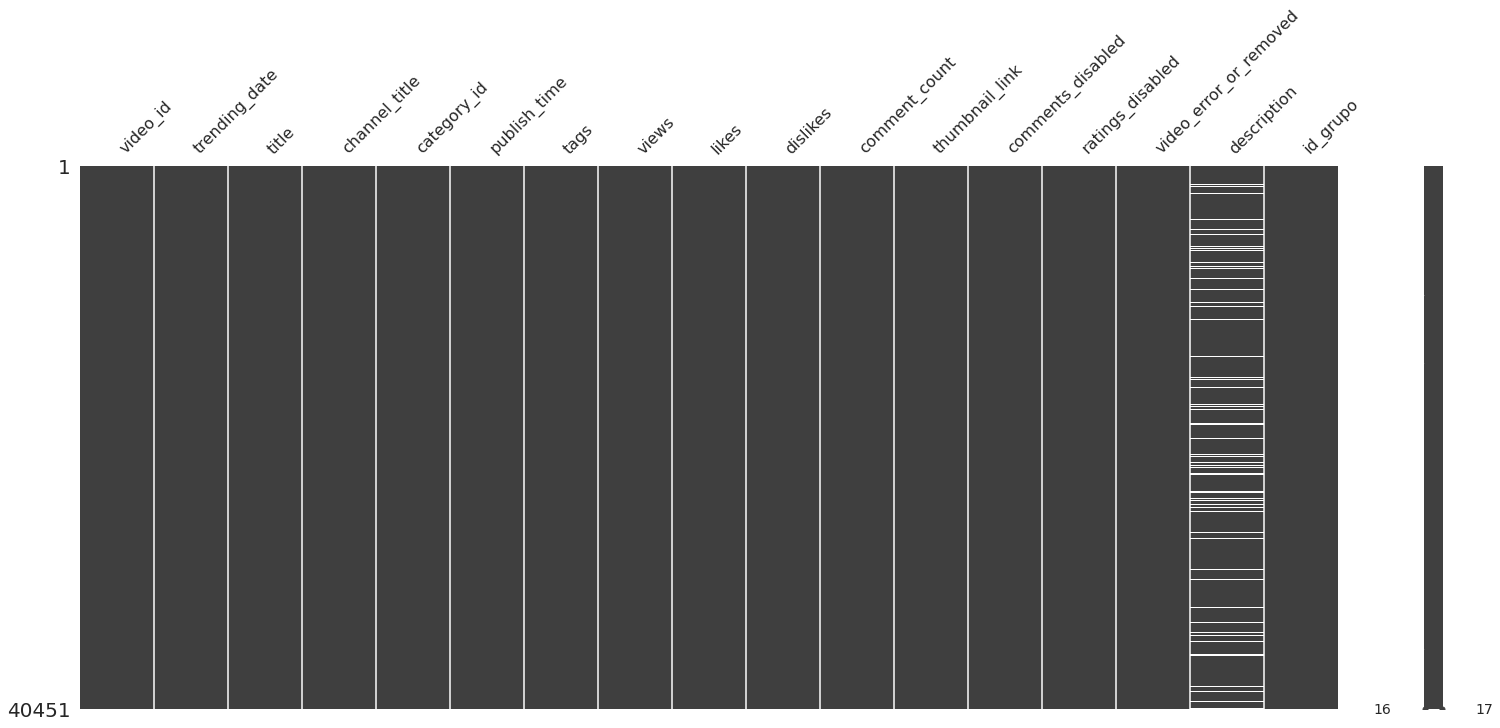

In [ ]:
import missingno as msno

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

msno.matrix(data_mx)

### ejemplo https://www.kaggle.com/kvdatadragon/eda-and-new-variables-by-churn

### VERIFICAR COLUMNAS CONSTANTES

### Es necesario tengamos nocion de los valores unicos por columna

In [ ]:
for col in data_mx.columns:
    print(col, data_mx[col].unique().shape[0])

data_mx.shape

video_id 33513
trending_date 205
title 33785
channel_title 6978
category_id 16
publish_time 33243
tags 23635
views 35915
likes 14564
dislikes 3693
comment_count 6310
thumbnail_link 33945
comments_disabled 2
ratings_disabled 2
video_error_or_removed 2
description 26738
id_grupo 1


(40451, 17)

In [ ]:
del data_mx['id_grupo']

In [ ]:
data_mx.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### MasterChef ?? 

In [ ]:
# list(data_mx['channel_title'].unique())

In [ ]:
list_values_master_chef = [x for x in data_mx['channel_title'].unique() if 'Master' in x]
print(list_values_master_chef)

len(list_values_master_chef)

['Masterchef 2017', 'ArteMaster', 'FutMaster', 'MasterFut MX', 'MasterChef 2017', 'MasterVirales10', 'Rap Master Pro', 'MasterBing22', 'Los Master Plus', 'Master', 'Shazzan Master of the trucks', 'MasteredTraxVEVO', 'Iron Masters']


13

In [ ]:
[x for x in data_mx['channel_title'].unique() if 'MaStEr' in x]

['JoSe MaStErGG']

In [ ]:
[x for x in data_mx['channel_title'].unique() if 'master' in x]

['ElvisaYomastercard']

### 3 OPCIONES

#### >>>>>>>>>>>>> 1- SLUGYFI https://github.com/un33k/python-slugify

In [ ]:
from slugify import slugify

In [ ]:
text_prueba = 'frggtgá9riori AAAAoeio-_@'
slugify(text_prueba)

'frggtga9riori-aaaaoeio'

In [ ]:
data_mx['channel_title_1'] = data_mx['channel_title'].apply(lambda x: slugify(x))


list_values_master_chef = [_ for _ in data_mx['channel_title_1'].unique() if 'master' in _]
print(list_values_master_chef)
len(list_values_master_chef)

['masterchef-2017', 'artemaster', 'futmaster', 'master-seita-n', 'elvisayomastercard', 'masterfut-mx', 'mastervirales10', 'rap-master-pro', 'masterbing22', 'los-master-plus', 'master', 'jose-mastergg', 'shazzan-master-of-the-trucks', 'masteredtraxvevo', 'iron-masters']


15

In [ ]:
for col in data_mx.columns:
    print(col, data_mx[col].unique().shape[0])

video_id 33513
trending_date 205
title 33785
channel_title 6978
category_id 16
publish_time 33243
tags 23635
views 35915
likes 14564
dislikes 3693
comment_count 6310
thumbnail_link 33945
comments_disabled 2
ratings_disabled 2
video_error_or_removed 2
description 26738
channel_title_1 6919
channel_title_2 6912
channel_title_3 6917
diff_date 3156
weekday_publish 7
month_publish 12
comments_disabled_int 2
ratings_disabled_int 2
video_error_or_removed_int 2


#### >>>>>>>>>>>>> 2- UNICODE DATA https://docs.python.org/3/library/unicodedata.html

In [ ]:
from unicodedata import normalize, category

def clean_text(val):
    return ''.join(
        [_ for _ in normalize('NFD', val.lower()) if category(_) in ['Ll', 'Nd', 'Zs']]
    )

data_mx['channel_title_2'] = data_mx['channel_title'].apply(clean_text)

list_values_master_chef = [_ for _ in data_mx['channel_title_2'].unique() if 'master' in _]
print(list_values_master_chef)
len(list_values_master_chef)

['masterchef 2017', 'artemaster', 'futmaster', 'master  seitan', 'elvisayomastercard', 'masterfut mx', 'mastervirales10', 'rap master pro', 'masterbing22', 'los master plus', 'master', 'jose mastergg', 'shazzan master of the trucks', 'masteredtraxvevo', 'iron masters']


15

In [ ]:
clean_text(text_prueba)

'frggtga9riori aaaaoeio'

#### >>>>>>>>>>>>> 3- ORD https://www.programiz.com/python-programming/methods/built-in/ord

In [ ]:
def clean_for_ord(val):
    return ''.join(
        [_ for _ in val.lower() if ord(_) < 128]
    )

data_mx['channel_title_3'] = data_mx['channel_title'].apply(clean_for_ord)

list_values_master_chef = [_ for _ in data_mx['channel_title_3'].unique() if 'master' in _]
print(list_values_master_chef)
len(list_values_master_chef)

['masterchef 2017', 'artemaster', 'futmaster', 'elvisayomastercard', 'masterfut mx', 'mastervirales10', 'rap master pro', 'masterbing22', 'los master plus', 'master', 'jose mastergg', 'shazzan master of the trucks', 'masteredtraxvevo', 'iron masters']


14

### COMPARE

### LA IDEA FINAL ES QUE CUANDO LOS VALORES VENGAN DE OTRA BASE DE DATOS O FUENTE CON ESTA TRANSFORMACION SE IGUALEN

In [ ]:
data_mx[['channel_title','channel_title_1', 'channel_title_2', 'channel_title_3']].head(20)

,channel_title,channel_title_1,channel_title_2,channel_title_3
0,Masterchef 2017,masterchef-2017,masterchef 2017,masterchef 2017
1,Micky Contreras Martinez,micky-contreras-martinez,micky contreras martinez,micky contreras martinez
2,El Pulso De La RepÃºblica,el-pulso-de-la-repaoblica,el pulso de la repablica,el pulso de la repblica
3,Casanare,casanare,casanare,casanare
4,Musas,musas,musas,musas
5,MÃSICA & ENTRETENIMIENTO,masica-entretenimiento,masica entretenimiento,msica & entretenimiento
6,La Resolana,la-resolana,la resolana,la resolana
7,concienciaradio,concienciaradio,concienciaradio,concienciaradio
8,Los mejores Top 10,los-mejores-top-10,los mejores top 10,los mejores top 10
9,DrossRotzank,drossrotzank,drossrotzank,drossrotzank


In [ ]:
for col in ['channel_title','channel_title_1', 'channel_title_2', 'channel_title_3']:
    print(col, data_mx[col].unique().shape)

channel_title (6978,)
channel_title_1 (6919,)
channel_title_2 (6912,)
channel_title_3 (6917,)


# DATES

### Tenemos dos columnas fechs y estan siendo tomadas como cadenas de texto

In [ ]:
data_mx.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
channel_title_1           object
channel_title_2           object
channel_title_3           object
dtype: object

In [ ]:
data_mx['publish_time'].head(10)

0    2017-11-13T06:06:22.000Z
1    2017-11-13T05:11:58.000Z
2    2017-11-13T17:00:02.000Z
3    2017-11-13T03:47:10.000Z
4    2017-11-13T19:17:48.000Z
5    2017-11-12T20:17:38.000Z
6    2017-11-13T07:00:03.000Z
7    2017-11-13T06:18:23.000Z
8    2017-11-12T19:54:12.000Z
9    2017-11-12T21:14:44.000Z
Name: publish_time, dtype: object

In [ ]:
data_mx['trending_date'].head(10)

0    17.14.11
1    17.14.11
2    17.14.11
3    17.14.11
4    17.14.11
5    17.14.11
6    17.14.11
7    17.14.11
8    17.14.11
9    17.14.11
Name: trending_date, dtype: object

### FORMAT https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

TO_DATETIME https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [ ]:
data_mx['trending_date'] = pd.to_datetime(
    data_mx['trending_date'], errors='coerce', format='%y.%d.%m'
)

data_mx['publish_time'] = pd.to_datetime(
    data_mx['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ'
)
data_mx.dtypes

video_id                              object
trending_date                 datetime64[ns]
title                                 object
channel_title                         object
category_id                             int8
publish_time                  datetime64[ns]
tags                                  object
views                                  int32
likes                                  int32
dislikes                               int32
comment_count                          int32
thumbnail_link                        object
comments_disabled                       bool
ratings_disabled                        bool
video_error_or_removed                  bool
description                           object
channel_title_1                       object
channel_title_2                       object
channel_title_3                       object
diff_date                            float32
weekday_publish                         int8
month_publish                           int8
comments_d

In [ ]:
data_mx[['publish_time', 'trending_date']].isnull().any()

publish_time     False
trending_date    False
dtype: bool

### AHORA YA ES POSIBLE HALLAR LA DIFRENCI ENTRE LA FECHA DE PUBLICACION Y LA FECHA DE TENDENCIA

In [ ]:
def apply_diff_mont(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)
    

data_mx['diff_date'] = apply_diff_mont(
    data_mx['trending_date'] - data_mx['publish_time']
)

In [ ]:
data_mx['diff_date'].head(15)

publish_time
2017-11-13 06:06:22    0.746
2017-11-13 05:11:58    0.783
2017-11-13 17:00:02    0.292
2017-11-13 03:47:10    0.842
2017-11-13 19:17:48    0.196
2017-11-12 20:17:38    1.154
2017-11-13 07:00:03    0.708
2017-11-13 06:18:23    0.737
2017-11-12 19:54:12    1.171
2017-11-12 21:14:44    1.115
2017-11-12 19:30:02    1.187
2017-11-13 01:16:16    0.947
2017-11-13 01:50:12    0.923
2017-11-13 04:44:51    0.802
2017-11-13 04:44:51    0.802
Name: diff_date, dtype: float64

## Y PODEMOS HALLAR MAS VARIANTES 

In [ ]:
data_mx['weekday_publish'] = data_mx['publish_time'].dt.weekday
data_mx['month_publish'] = data_mx['publish_time'].dt.month

data_mx[['month_publish', 'weekday_publish']].head(15)

,month_publish,weekday_publish
0,11,0
1,11,0
2,11,0
3,11,0
4,11,0
5,11,6
6,11,0
7,11,0
8,11,6
9,11,6


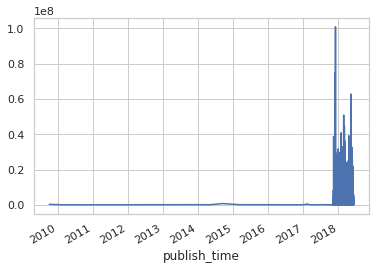

In [ ]:
### INCLUSO APLICAR SERIES DE TIEMPO
#grafico
import matplotlib.pyplot as plt
%matplotlib inline

data_mx.index = data_mx.publish_time

data_mx.views.sort_index().plot()

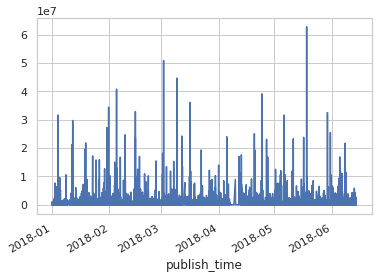

In [ ]:
data_mx[data_mx['publish_time'].dt.year >= 2018].views.sort_index().plot()

# PASAR LOS BOOLEANOS A ENTEROS

In [ ]:
data_mx.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
channel_title_1                   object
channel_title_2                   object
channel_title_3                   object
diff_date                        float64
weekday_publish                    int64
month_publish                      int64
dtype: object

In [ ]:
for col in ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']:
    data_mx[col + '_int'] = data_mx[col].astype(int)
    

data_mx[
    ['comments_disabled', 'comments_disabled_int','ratings_disabled', 'ratings_disabled_int', 'video_error_or_removed', 'video_error_or_removed_int']
].head(20)

,comments_disabled,comments_disabled_int,ratings_disabled,ratings_disabled_int,video_error_or_removed,video_error_or_removed_int
publish_time,,,,,,
2017-11-13 06:06:22,False,0,False,0,False,0
2017-11-13 05:11:58,False,0,False,0,False,0
2017-11-13 17:00:02,False,0,False,0,False,0
2017-11-13 03:47:10,False,0,False,0,False,0
2017-11-13 19:17:48,False,0,False,0,False,0
2017-11-12 20:17:38,False,0,False,0,False,0
2017-11-13 07:00:03,False,0,False,0,False,0
2017-11-13 06:18:23,True,1,False,0,False,0
2017-11-12 19:54:12,False,0,False,0,False,0


In [ ]:
def get_memory_usage(data, deep=True):
    return '{} MB'.format(data.memory_usage(deep=deep).sum() / 1024 ** 2)

In [ ]:
def reduce_size_data(df, category=False, default=''):
    print("INITIAL SIZE : DEEP", get_memory_usage(df), "REAL", get_memory_usage(df, deep=False))
    # print("-> Int 64 Detected")
    
    for col in df.select_dtypes(include=['int']).columns:
        # print(" "*4, col)
        df[col] = pd.to_numeric(arg=df[col], downcast=default or'integer')
    
    
    # print("-> Float 64 Detected")
    for col in df.select_dtypes(include=['float']).columns:
        # print(" "*4, col)
        df[col] = pd.to_numeric(arg=df[col], downcast=default or'float')
    
    if category:
        for col in df.select_dtypes(include=['object']).columns:
            if len(df[col].unique()) / len(df[col]) < 0.5:
                df[col] = df[col].astype('category')
                
    print("FINAL SIZE : DEPP", get_memory_usage(df), "REAL", get_memory_usage(df, deep=False))               
    return df

In [ ]:
data_mx = reduce_size_data(data_mx)

INITIAL SIZE : DEEP 73.02114295959473 MB REAL 7.213913917541504 MB
FINAL SIZE : DEPP 70.62936401367188 MB REAL 4.822134971618652 MB


# ejemplo https://github.com/kendalvictor/guia_data_ML/blob/master/REDUCIR%20USO%20DE%20MEMORIA%20DEL%20DATAFRAME.ipynb